<a href="https://colab.research.google.com/github/Vojaspy/Deep-Learning-Project/blob/master/Deep_Learning_Project_Identifying_disease_in_tea_leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from zipfile import ZipFile
from google.colab import drive
import cv2
import os

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
zip_ref =  ZipFile('/content/drive/MyDrive/Deep Learning Project Dataset/archive (5).zip', 'r')

  #extract in current directory
zip_ref.extractall("/tmp")
zip_ref.close()

In [4]:
fpath = '/tmp/tea sickness dataset'

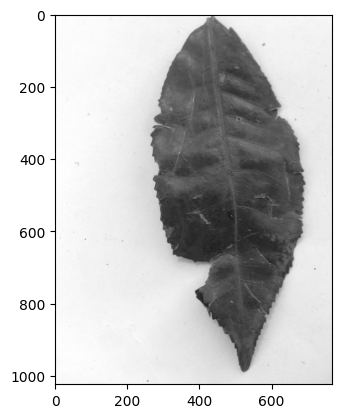

In [5]:
for cpath in os.listdir(fpath):
  cpath = os.path.join(fpath,cpath)
  for imgpath in os.listdir(cpath):
    img = cv2.imread(os.path.join(cpath, imgpath), 0)
    plt.imshow(img, cmap='gray')
    break

In [6]:
class_names = []
for x in os.walk(fpath):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    x_class = (sub_dir_list[-1])
    class_names.append(x_class)

print(class_names)

['tea sickness dataset', 'algal leaf', 'bird eye spot', 'gray light', 'brown blight', 'Anthracnose', 'healthy', 'red leaf spot', 'white spot']


# Displaying 5 images of healthy as well as each disease

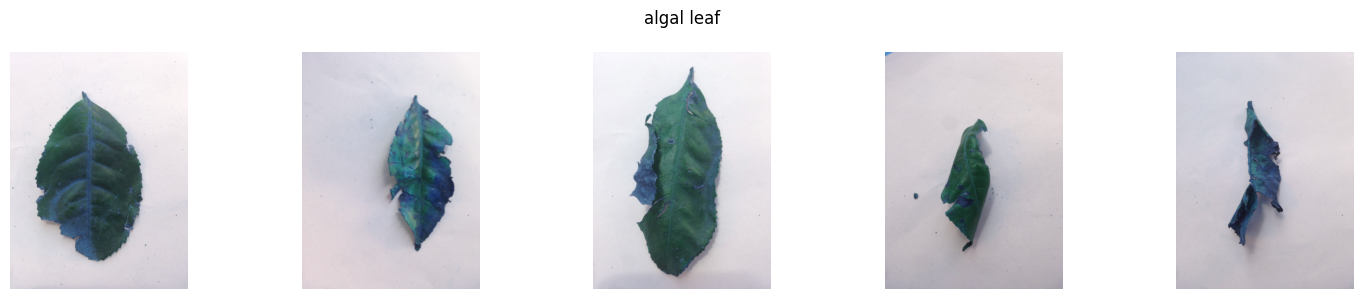

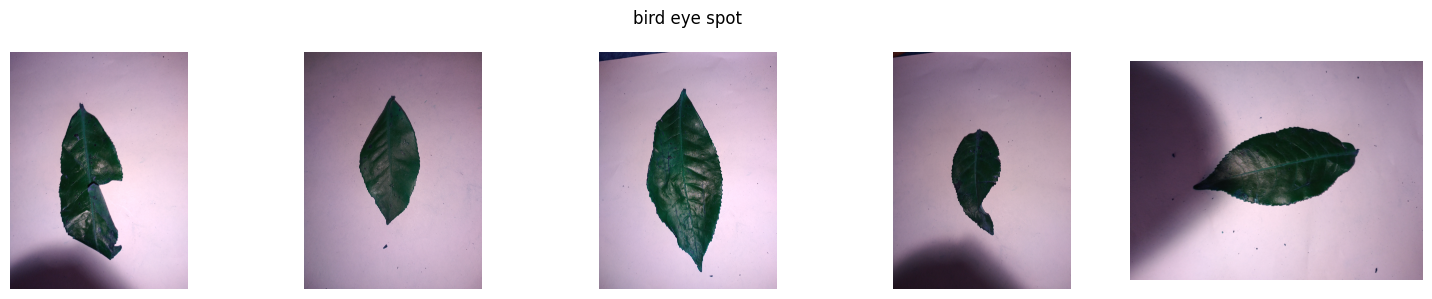

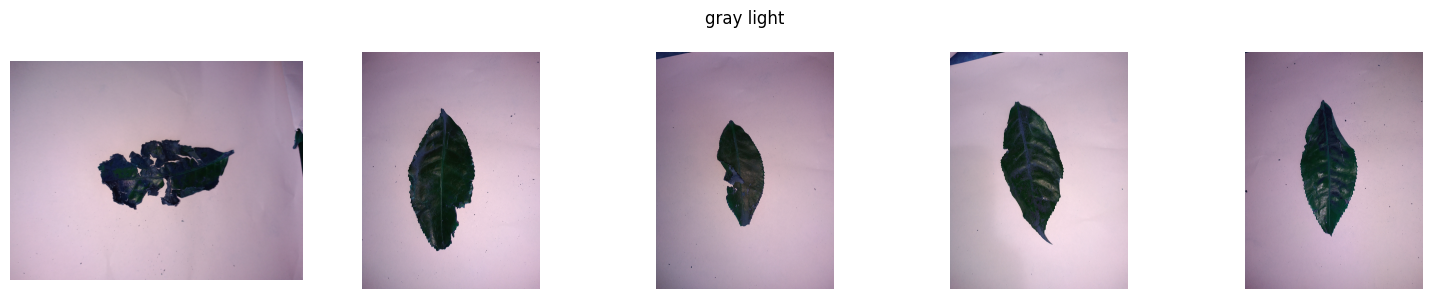

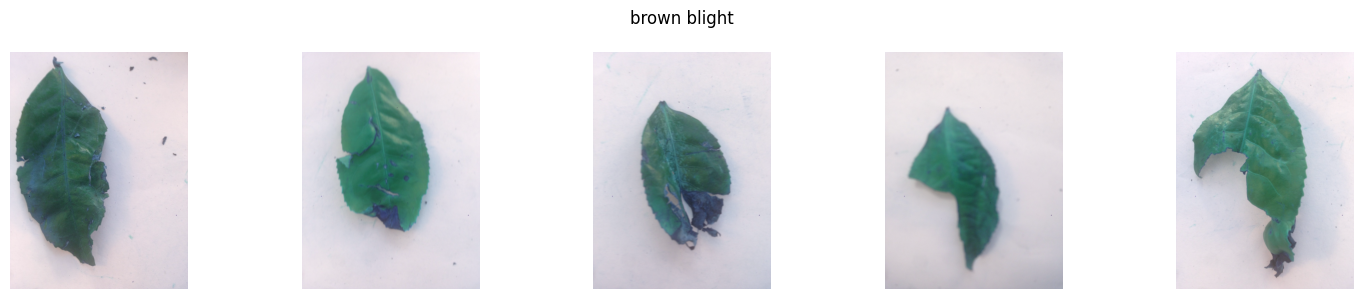

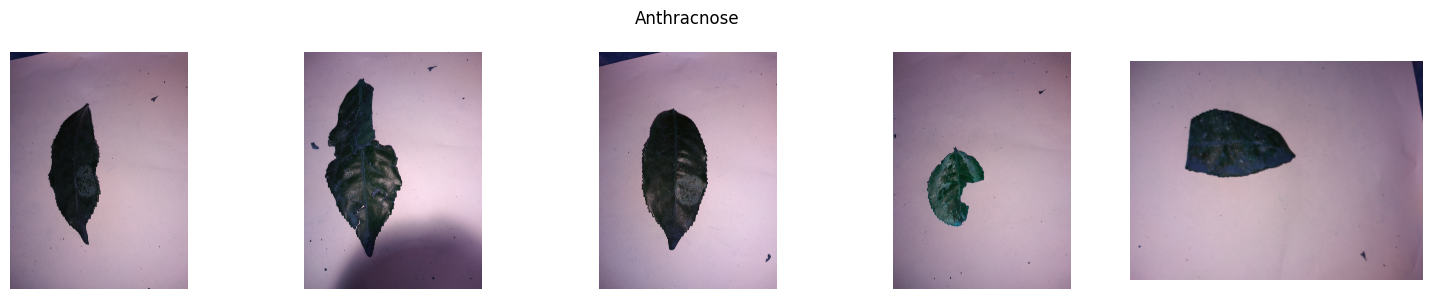

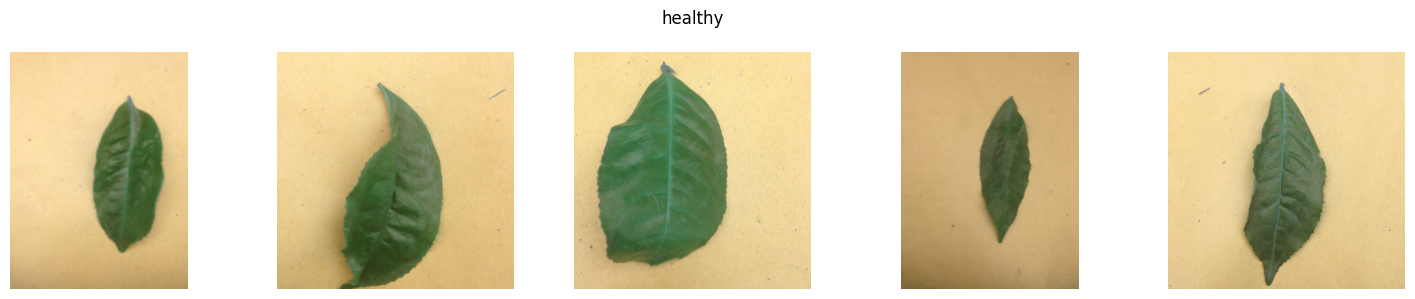

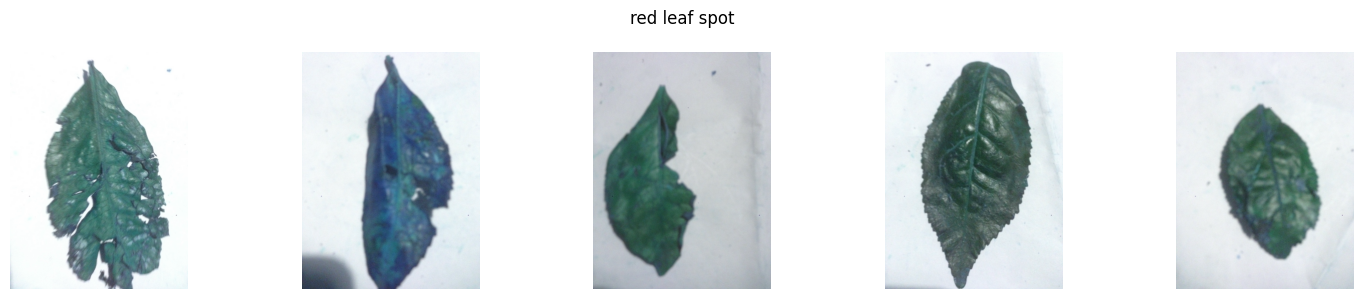

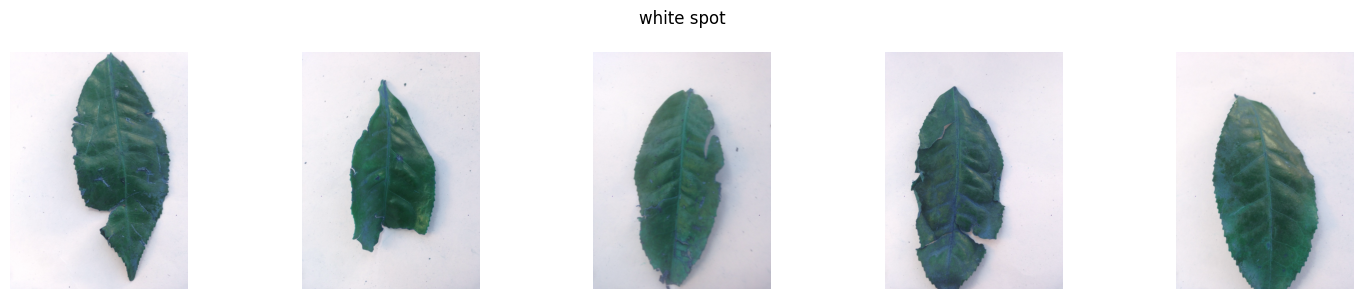

In [7]:
import matplotlib.pyplot as plt
import cv2
import os

for cpath in os.listdir(fpath):
  cpath = os.path.join(fpath, cpath)

  img_paths = [os.path.join(cpath, imgpath) for imgpath in os.listdir(cpath)]


  fig, axs = plt.subplots(1, 5, figsize=(15, 3))


  for i, img_path in enumerate(img_paths[:5]):
    img = cv2.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')

  fig.suptitle(os.path.basename(cpath))

  plt.tight_layout()
  plt.show()


# Displaying Total number of images in the dataset

In [8]:
total_images = 0
for cpath in os.listdir(fpath):
    cpath = os.path.join(fpath, cpath)

    for imgpath in os.listdir(cpath):
        # Increment the total image count
        total_images = total_images + 1

In [9]:
print(total_images)

885


In [10]:
target_folder = 'Anthracnose'
anthfolder = os.path.join(fpath,target_folder)
len(os.listdir(anthfolder))

100

In [11]:
target_folders = ['Anthracnose','algal leaf','bird eye spot','brown blight','gray light','healthy','red leaf spot','white spot']

for folder in target_folders:
  currFolder = os.path.join(fpath,folder)
  print("Number of images in",folder,"is : ",len(os.listdir(currFolder)))

Number of images in Anthracnose is :  100
Number of images in algal leaf is :  113
Number of images in bird eye spot is :  100
Number of images in brown blight is :  113
Number of images in gray light is :  100
Number of images in healthy is :  74
Number of images in red leaf spot is :  143
Number of images in white spot is :  142


# Spliting Dataset for training, testing and validation

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import cv2
from sklearn.model_selection import train_test_split

In [13]:
filepath = []
labels = []
for label in os.listdir(fpath):
  for img_path in os.listdir(os.path.join(fpath, label)):
    filepath.append(os.path.join(fpath, label, img_path))
    labels.append(label)
labels = pd.Series(labels, name='labels')
filepaths = pd.Series(filepath, name='filepaths')
df = pd.concat([filepaths, labels], axis=1)

In [14]:
df.head()

,filepaths,labels
0,/tmp/tea sickness dataset/algal leaf/UNADJUSTE...,algal leaf
1,/tmp/tea sickness dataset/algal leaf/UNADJUSTE...,algal leaf
2,/tmp/tea sickness dataset/algal leaf/UNADJUSTE...,algal leaf
3,/tmp/tea sickness dataset/algal leaf/UNADJUSTE...,algal leaf
4,/tmp/tea sickness dataset/algal leaf/UNADJUSTE...,algal leaf


In [15]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [16]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1/255.0,
    validation_split = 0.2
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0
)

In [17]:
train_dataset = train_datagen.flow_from_dataframe(
  df_train,
  x_col = 'filepaths',
  y_col = 'labels',
  color_mode='rgb',
  subset="training",
  target_size = (256,256)
)

validation_dataset = train_datagen.flow_from_dataframe(
  df_train,
  x_col = 'filepaths',
  y_col = 'labels',
  color_mode='rgb',
  subset="validation",
  target_size = (256,256)
)

Found 567 validated image filenames belonging to 8 classes.
Found 141 validated image filenames belonging to 8 classes.


In [18]:
test_dataset = train_datagen.flow_from_dataframe(
    df_test,
    x_col = 'filepaths',
    y_col = 'labels',
    color_mode='rgb',
    target_size = (256,256)
)

Found 177 validated image filenames belonging to 8 classes.


# Defining the model

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [20]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding = 'same',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='softmax'))



In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                   

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
epochs=15
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs,
  batch_size=32
)

Epoch 1/15
18/18 [==============================] - 77s 3s/step - loss: 3.8239 - accuracy: 0.1587 - val_loss: 2.0619 - val_accuracy: 0.1631
Epoch 2/15
18/18 [==============================] - 28s 2s/step - loss: 2.0685 - accuracy: 0.1534 - val_loss: 2.0541 - val_accuracy: 0.1631
Epoch 3/15
18/18 [==============================] - 30s 2s/step - loss: 2.0654 - accuracy: 0.1623 - val_loss: 2.0571 - val_accuracy: 0.1631
Epoch 4/15
18/18 [==============================] - 35s 2s/step - loss: 2.0668 - accuracy: 0.1605 - val_loss: 2.0567 - val_accuracy: 0.1631
Epoch 5/15
18/18 [==============================] - 30s 2s/step - loss: 2.0643 - accuracy: 0.1481 - val_loss: 2.0566 - val_accuracy: 0.1631
Epoch 6/15
18/18 [==============================] - 28s 2s/step - loss: 2.0651 - accuracy: 0.1623 - val_loss: 2.0558 - val_accuracy: 0.1631
Epoch 7/15
18/18 [==============================] - 31s 2s/step - loss: 2.0652 - accuracy: 0.1499 - val_loss: 2.0562 - val_accuracy: 0.1631
Epoch 8/15
18/18 [==